# Finding the sentiment analysis of the songs 

In [1]:
from helpers import *
import pandas as pd
import numpy as np

In [2]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\nicol\AppData\Local\Temp\ipykernel_26780\1407372790.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
#To create the sentiment analysis model, tokenization and lemmatization
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
import re
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [95]:
path= "D:\Final-Project-TM\data\lists of songs"

df= pd.read_csv(path + '\dataframe_with_lyrics_completecases.csv')

In [96]:
df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0               songs  \
0               3             3           3       Drip Too Hard   
1               5             5           5        MIDDLE CHILD   
2               6             6           6          SICKO MODE   
3               7             7           7                Suge   
4               8             8           8             7 rings   
..            ...           ...         ...                 ...   
947          1192          1192          93             Thunder   
948          1194          1194          95  Late Night Talking   
949          1195          1195          96            Memories   
950          1196          1196          97         Sex On Fire   
951          1197          1197          98  Castle on the Hill   

              artist                         title  \
0    Lil Baby, Gunna        Top Songs of 2019: USA   
1            J. Cole        Top Songs of 2019: USA   
2       Travis Scott        Top Songs of 2019: USA   
3             DaBaby        Top Songs of 2019: USA   
4      Ariana Grande        Top Songs of 2019: USA   
..               ...                           ...   
947  Imagine Dragons  Top Songs of 2022: Australia   
948     Harry Styles  Top Songs of 2022: Australia   
949         Maroon 5  Top Songs of 2022: Australia   
950    Kings of Leon  Top Songs of 2022: Australia   
951       Ed Sheeran  Top Songs of 2022: Australia   

                                                lyrics enumerated_list  \
0    TranslationsTürkçeDanskDrip Too Hard Lyrics\nR...              []   
1    TranslationsTürkçeEspañolРусскийPortuguêsMIDDL...              []   
2    TranslationsTürkçeEspañolEnglishPortuguêsFranç...              []   
3    Suge Lyrics\nPooh, you a fool for this one\nHa...              []   
4    TranslationsTürkçeEspañolRomânăPortuguêsPolski...              []   
..                                                 ...             ...   
947  TranslationsSlovenčinaPortuguêsΕλληνικάMagyarT...              []   
948  TranslationsTürkçeEspañolPortuguêsहिन्दीDeutsc...              []   
949  TranslationsTürkçePortuguêsPolskiفارسیMemories...              []   
950  Sex on Fire Lyrics\nLay where you're layin'\nD...              []   
951  TranslationsTürkçeEspañolPortuguêsDeutschEd Sh...              []   

     lyrics_not_found  
0               False  
1               False  
2               False  
3               False  
4               False  
..                ...  
947             False  
948             False  
949             False  
950             False  
951             False  

[952 rows x 9 columns]

In [97]:
# Lowercasing
df['lyrics'] = df['lyrics'].str.lower()

# Removing punctuation
df['lyrics'] = df['lyrics'].apply(lambda x: re.sub('[^\w\s]', '', x))

# Tokenization and Stopword removal
stopwords = nltk.corpus.stopwords.words('english')

df['lyrics'] = df['lyrics'].apply(lambda x: [word for word in nltk.word_tokenize(x) if word not in stopwords])

# Stemming
stemmer = nltk.stem.PorterStemmer()
df['lyrics'] = df['lyrics'].apply(lambda x: [stemmer.stem(word) for word in x])

# Removing non-alphabetic characters
df['lyrics'] = df['lyrics'].apply(lambda x: [re.sub('[^A-Za-z0-9]+', '', word) for word in x])


In [98]:
df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0               songs  \
0               3             3           3       Drip Too Hard   
1               5             5           5        MIDDLE CHILD   
2               6             6           6          SICKO MODE   
3               7             7           7                Suge   
4               8             8           8             7 rings   
..            ...           ...         ...                 ...   
947          1192          1192          93             Thunder   
948          1194          1194          95  Late Night Talking   
949          1195          1195          96            Memories   
950          1196          1196          97         Sex On Fire   
951          1197          1197          98  Castle on the Hill   

              artist                         title  \
0    Lil Baby, Gunna        Top Songs of 2019: USA   
1            J. Cole        Top Songs of 2019: USA   
2       Travis Scott        Top Songs of 2019: USA   
3             DaBaby        Top Songs of 2019: USA   
4      Ariana Grande        Top Songs of 2019: USA   
..               ...                           ...   
947  Imagine Dragons  Top Songs of 2022: Australia   
948     Harry Styles  Top Songs of 2022: Australia   
949         Maroon 5  Top Songs of 2022: Australia   
950    Kings of Leon  Top Songs of 2022: Australia   
951       Ed Sheeran  Top Songs of 2022: Australia   

                                                lyrics enumerated_list  \
0    [translationstrkedanskdrip, hard, lyric, run, ...              []   
1    [translationstrkeespaolportugusmiddl, child, l...              []   
2    [translationstrkeespaolenglishportugusfranaisd...              []   
3    [suge, lyric, pooh, fool, one, ha, oh, lord, j...              []   
4    [translationstrkeespaolromnportuguspolskiitali...              []   
..                                                 ...             ...   
947  [translationssloveninaportugusmagyarthund, lyr...              []   
948  [translationstrkeespaolportugusdeutschfranaisl...              []   
949  [translationstrkeportuguspolskimemori, lyric, ...              []   
950  [sex, fire, lyric, lay, your, layin, dont, mak...              []   
951  [translationstrkeespaolportugusdeutsch, sheera...              []   

     lyrics_not_found  
0               False  
1               False  
2               False  
3               False  
4               False  
..                ...  
947             False  
948             False  
949             False  
950             False  
951             False  

[952 rows x 9 columns]

In [99]:
#also removing any words that contain 'translations' in a word like translationstrkeportuguspolskimemori

#df['lyrics'] = df['lyrics'].apply(lambda x: [re.sub('[^A-Za-z0-9]+', '', word) for word in x if 'translations' or 'lyric' or 'yeah' or 'like' not in word])
# List of words to be removed
remove_words = ['translations', 'lyric', 'yeah', 'like','ooh']

# Function to remove the words
def remove_words_from_lyrics(lyrics):
    return [re.sub('[^A-Za-z0-9]+', '', word) for word in lyrics if not any(remove_word in word.lower() for remove_word in remove_words)]

# Apply the function to the lyrics column
df['lyrics'] = df['lyrics'].apply(remove_words_from_lyrics)

In [100]:
df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0               songs  \
0               3             3           3       Drip Too Hard   
1               5             5           5        MIDDLE CHILD   
2               6             6           6          SICKO MODE   
3               7             7           7                Suge   
4               8             8           8             7 rings   
..            ...           ...         ...                 ...   
947          1192          1192          93             Thunder   
948          1194          1194          95  Late Night Talking   
949          1195          1195          96            Memories   
950          1196          1196          97         Sex On Fire   
951          1197          1197          98  Castle on the Hill   

              artist                         title  \
0    Lil Baby, Gunna        Top Songs of 2019: USA   
1            J. Cole        Top Songs of 2019: USA   
2       Travis Scott        Top Songs of 2019: USA   
3             DaBaby        Top Songs of 2019: USA   
4      Ariana Grande        Top Songs of 2019: USA   
..               ...                           ...   
947  Imagine Dragons  Top Songs of 2022: Australia   
948     Harry Styles  Top Songs of 2022: Australia   
949         Maroon 5  Top Songs of 2022: Australia   
950    Kings of Leon  Top Songs of 2022: Australia   
951       Ed Sheeran  Top Songs of 2022: Australia   

                                                lyrics enumerated_list  \
0    [hard, run, back, turbo, get, biggest, chanel,...              []   
1    [child, good, tminu, nigga, countin, im, count...              []   
2    [mode, astro, sun, freezin, cold, that, alread...              []   
3    [suge, fool, one, ha, oh, lord, jetson, made, ...              []   
4    [ring, breakfast, tiffani, bottl, bubbl, girl,...              []   
..                                                 ...             ...   
947  [young, gun, quick, fuse, uptight, wan, na, le...              []   
948  [night, talk, thing, havent, quit, there, haze...              []   
949  [here, one, got, cheer, wish, your, caus, drin...              []   
950  [sex, fire, lay, your, layin, dont, make, soun...              []   
951  [sheeran, castl, hill, , , ed, sheeran, castl,...              []   

     lyrics_not_found  
0               False  
1               False  
2               False  
3               False  
4               False  
..                ...  
947             False  
948             False  
949             False  
950             False  
951             False  

[952 rows x 9 columns]

In [101]:
#!pip install better_profanity
#!pip install profanity_check
import better_profanity
from better_profanity import profanity

def remove_unwanted_words(lyrics):
    # Convert lyrics to lowercase
    lyrics = [word.lower() for word in lyrics]
    
    # Remove non-alphanumeric characters and profanity words
    clean_lyrics = [re.sub('[^A-Za-z0-9]+', '', profanity.censor(word)) for word in lyrics]
    
    return clean_lyrics

# Apply the function to the lyrics column
df['lyrics'] = df['lyrics'].apply(remove_unwanted_words)

In [102]:
df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0               songs  \
0               3             3           3       Drip Too Hard   
1               5             5           5        MIDDLE CHILD   
2               6             6           6          SICKO MODE   
3               7             7           7                Suge   
4               8             8           8             7 rings   
..            ...           ...         ...                 ...   
947          1192          1192          93             Thunder   
948          1194          1194          95  Late Night Talking   
949          1195          1195          96            Memories   
950          1196          1196          97         Sex On Fire   
951          1197          1197          98  Castle on the Hill   

              artist                         title  \
0    Lil Baby, Gunna        Top Songs of 2019: USA   
1            J. Cole        Top Songs of 2019: USA   
2       Travis Scott        Top Songs of 2019: USA   
3             DaBaby        Top Songs of 2019: USA   
4      Ariana Grande        Top Songs of 2019: USA   
..               ...                           ...   
947  Imagine Dragons  Top Songs of 2022: Australia   
948     Harry Styles  Top Songs of 2022: Australia   
949         Maroon 5  Top Songs of 2022: Australia   
950    Kings of Leon  Top Songs of 2022: Australia   
951       Ed Sheeran  Top Songs of 2022: Australia   

                                                lyrics enumerated_list  \
0    [hard, run, back, turbo, get, biggest, chanel,...              []   
1    [child, good, tminu, , countin, im, countin, b...              []   
2    [mode, astro, sun, freezin, cold, that, alread...              []   
3    [suge, fool, one, ha, oh, lord, jetson, made, ...              []   
4    [ring, breakfast, tiffani, bottl, bubbl, girl,...              []   
..                                                 ...             ...   
947  [young, gun, quick, fuse, uptight, wan, na, le...              []   
948  [night, talk, thing, havent, quit, there, haze...              []   
949  [here, one, got, cheer, wish, your, caus, drin...              []   
950  [, fire, lay, your, layin, dont, make, sound, ...              []   
951  [sheeran, castl, hill, , , ed, sheeran, castl,...              []   

     lyrics_not_found  
0               False  
1               False  
2               False  
3               False  
4               False  
..                ...  
947             False  
948             False  
949             False  
950             False  
951             False  

[952 rows x 9 columns]

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

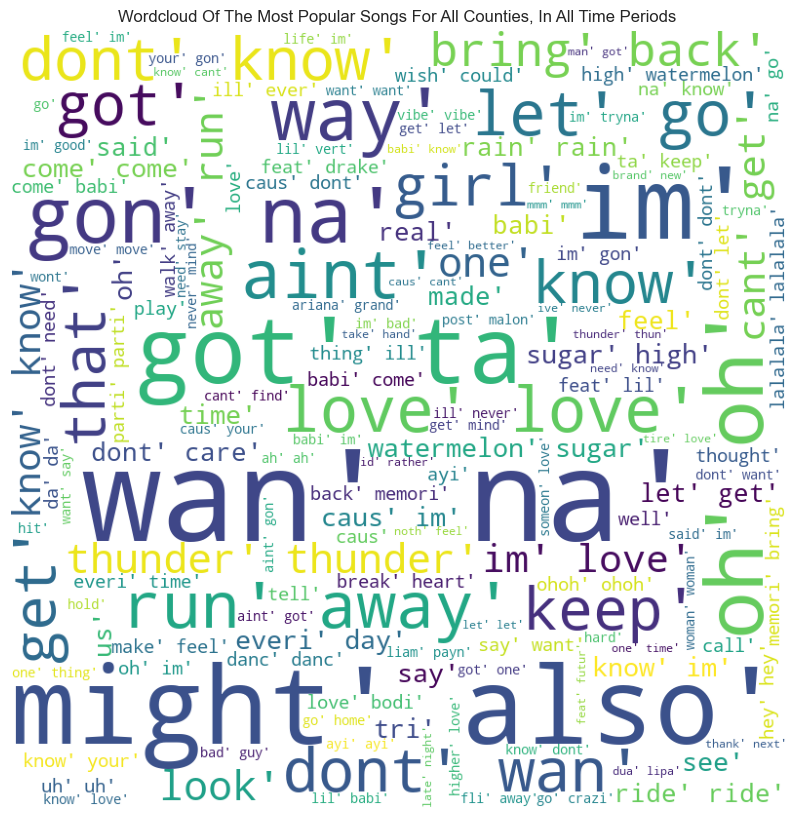

In [103]:
all_lyrics = ' '.join(df['lyrics'].astype('U').tolist())

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_lyrics)

# Display the generated image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.title("Wordcloud Of The Most Popular Songs For All Counties, In All Time Periods ")
plt.axis("off")
plt.tight_layout(pad=0)

In [104]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the DataFrame
#df = pd.read_csv('lyrics.csv')

# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score for each row in the DataFrame
def get_sentiment(row):
    lyrics = row['lyrics']
    # Convert the list of lyrics to a string
    lyrics_str = ' '.join(lyrics)
    # Calculate the sentiment score for the lyrics string
    sentiment_score = sia.polarity_scores(lyrics_str)
    # Convert the sentiment score to a dictionary
    sentiment_dict = dict(sentiment_score)
    return sentiment_dict

# Apply the function to the DataFrame
df['sentiment'] = df.apply(get_sentiment, axis=1)

# Extract the sentiment score from the 'sentiment' column and add it to the DataFrame as separate columns
df['neg'] = df['sentiment'].apply(lambda x: x['neg'])
df['neu'] = df['sentiment'].apply(lambda x: x['neu'])
df['pos'] = df['sentiment'].apply(lambda x: x['pos'])
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

In [105]:
df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0               songs  \
0               3             3           3       Drip Too Hard   
1               5             5           5        MIDDLE CHILD   
2               6             6           6          SICKO MODE   
3               7             7           7                Suge   
4               8             8           8             7 rings   
..            ...           ...         ...                 ...   
947          1192          1192          93             Thunder   
948          1194          1194          95  Late Night Talking   
949          1195          1195          96            Memories   
950          1196          1196          97         Sex On Fire   
951          1197          1197          98  Castle on the Hill   

              artist                         title  \
0    Lil Baby, Gunna        Top Songs of 2019: USA   
1            J. Cole        Top Songs of 2019: USA   
2       Travis Scott        Top Songs of 2019: USA   
3             DaBaby        Top Songs of 2019: USA   
4      Ariana Grande        Top Songs of 2019: USA   
..               ...                           ...   
947  Imagine Dragons  Top Songs of 2022: Australia   
948     Harry Styles  Top Songs of 2022: Australia   
949         Maroon 5  Top Songs of 2022: Australia   
950    Kings of Leon  Top Songs of 2022: Australia   
951       Ed Sheeran  Top Songs of 2022: Australia   

                                                lyrics enumerated_list  \
0    [hard, run, back, turbo, get, biggest, chanel,...              []   
1    [child, good, tminu, , countin, im, countin, b...              []   
2    [mode, astro, sun, freezin, cold, that, alread...              []   
3    [suge, fool, one, ha, oh, lord, jetson, made, ...              []   
4    [ring, breakfast, tiffani, bottl, bubbl, girl,...              []   
..                                                 ...             ...   
947  [young, gun, quick, fuse, uptight, wan, na, le...              []   
948  [night, talk, thing, havent, quit, there, haze...              []   
949  [here, one, got, cheer, wish, your, caus, drin...              []   
950  [, fire, lay, your, layin, dont, make, sound, ...              []   
951  [sheeran, castl, hill, , , ed, sheeran, castl,...              []   

     lyrics_not_found                                          sentiment  \
0               False  {'neg': 0.189, 'neu': 0.766, 'pos': 0.045, 'co...   
1               False  {'neg': 0.122, 'neu': 0.746, 'pos': 0.132, 'co...   
2               False  {'neg': 0.069, 'neu': 0.795, 'pos': 0.136, 'co...   
3               False  {'neg': 0.077, 'neu': 0.704, 'pos': 0.22, 'com...   
4               False  {'neg': 0.065, 'neu': 0.689, 'pos': 0.246, 'co...   
..                ...                                                ...   
947             False  {'neg': 0.021, 'neu': 0.895, 'pos': 0.085, 'co...   
948             False  {'neg': 0.04, 'neu': 0.821, 'pos': 0.139, 'com...   
949             False  {'neg': 0.138, 'neu': 0.768, 'pos': 0.094, 'co...   
950             False  {'neg': 0.165, 'neu': 0.664, 'pos': 0.172, 'co...   
951             False  {'neg': 0.062, 'neu': 0.813, 'pos': 0.124, 'co...   

       neg    neu    pos  compound  
0    0.189  0.766  0.045   -0.9910  
1    0.122  0.746  0.132    0.6749  
2    0.069  0.795  0.136    0.9844  
3    0.077  0.704  0.220    0.9917  
4    0.065  0.689  0.246    0.9799  
..     ...    ...    ...       ...  
947  0.021  0.895  0.085    0.9081  
948  0.040  0.821  0.139    0.9305  
949  0.138  0.768  0.094   -0.8796  
950  0.165  0.664  0.172    0.5574  
951  0.062  0.813  0.124    0.9287  

[952 rows x 14 columns]

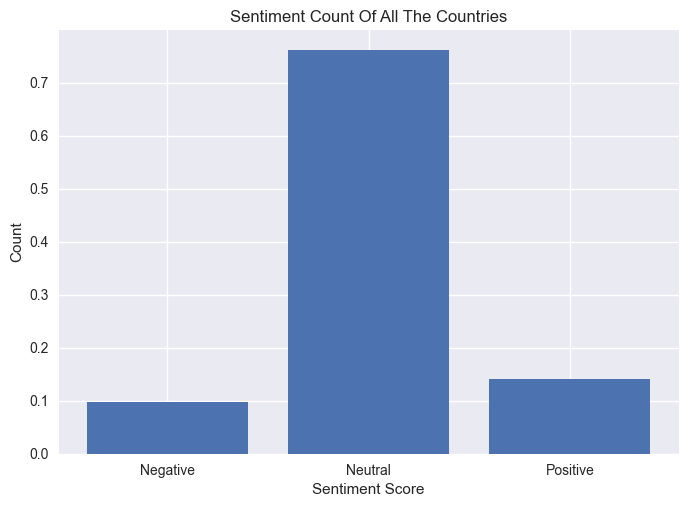

In [106]:
neg_mean = df['neg'].mean()
neu_mean = df['neu'].mean()
pos_mean = df['pos'].mean()

mean_values = [neg_mean, neu_mean, pos_mean]

# Create a list of the x-axis labels
labels = ['Negative', 'Neutral', 'Positive']

# Create a bar plot of the mean values
plt.bar(labels, mean_values)


# Set the plot title and axis labels
plt.title('Sentiment Count Of All The Countries')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')

# Show the plot
plt.show()

For most of the songs, the highest score is the neutral sentiment.

## Creating different dataframes for each country's playlist

In [107]:
groups=df['title'].unique()
new_dfs={}
for group in groups:
    name = str(group)
    new_dfs[name] = df[df['title'] == group]

USA2019=new_dfs['Top Songs of 2019: USA']


In [108]:
USA2020=new_dfs['Top Songs of 2020: USA']
USA2021=new_dfs['Top Songs of 2021: USA']
USA2022=new_dfs['Top Songs of 2022: USA']
NZ2019=new_dfs['Top Songs of 2019: New Zealand']
NZ2020=new_dfs['Top Songs of 2020: New Zealand']
NZ2021=new_dfs['Top Songs of 2021: New Zealand']
NZ2022=new_dfs['Top Songs of 2022: New Zealand']
AUS2019=new_dfs['Top Songs of 2019: Australia']
AUS2020=new_dfs['Top Songs of 2020: Australia']
AUS2021=new_dfs['Top Songs of 2021: Australia']
AUS2022=new_dfs['Top Songs of 2022: Australia']

## word clouds for each country and seeing the most popular words

In [109]:
def generate_wordclouds(alldfs):
    for df in alldfs:
        # Combine all lyrics into a single string
        lyrics = " ".join(df['lyrics'].astype('U').tolist())
        title = df.iloc[0]['title']
        # Generate word cloud
        wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=5).generate(lyrics)

        # Plot word cloud
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(title)
        plt.tight_layout(pad=0)
        plt.show()
alldfs=[USA2019,USA2020,USA2021,USA2022,NZ2019,NZ2020,NZ2021,NZ2022,AUS2019,AUS2020,AUS2021,AUS2022]


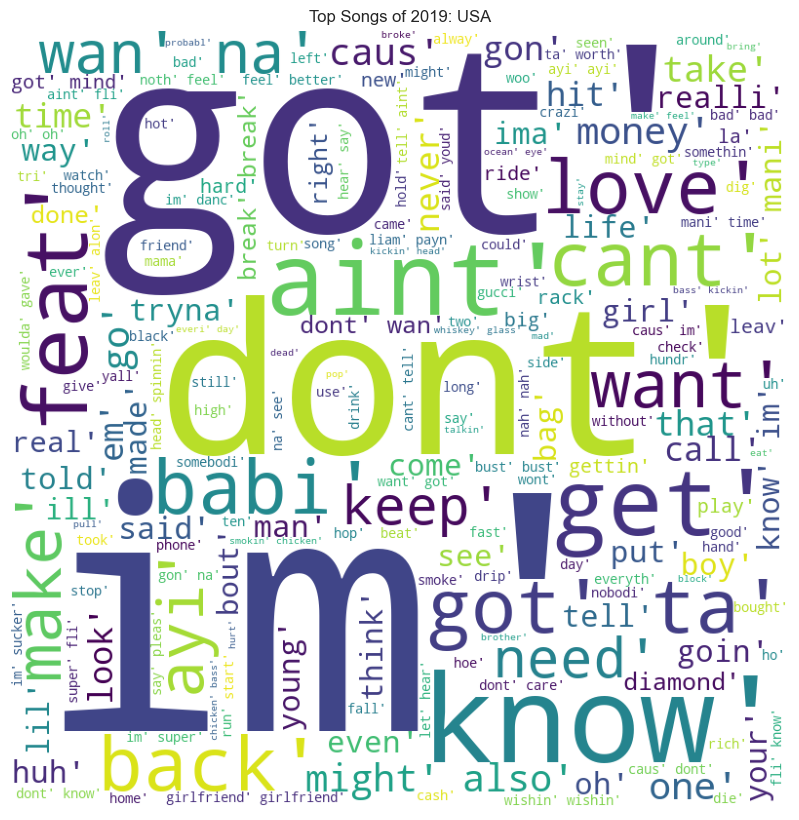

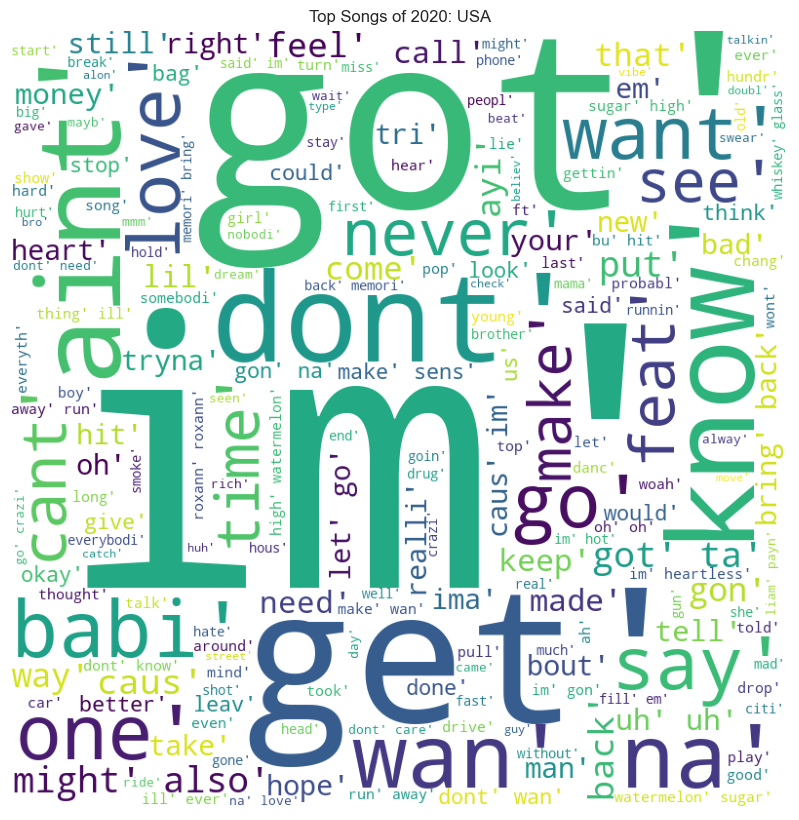

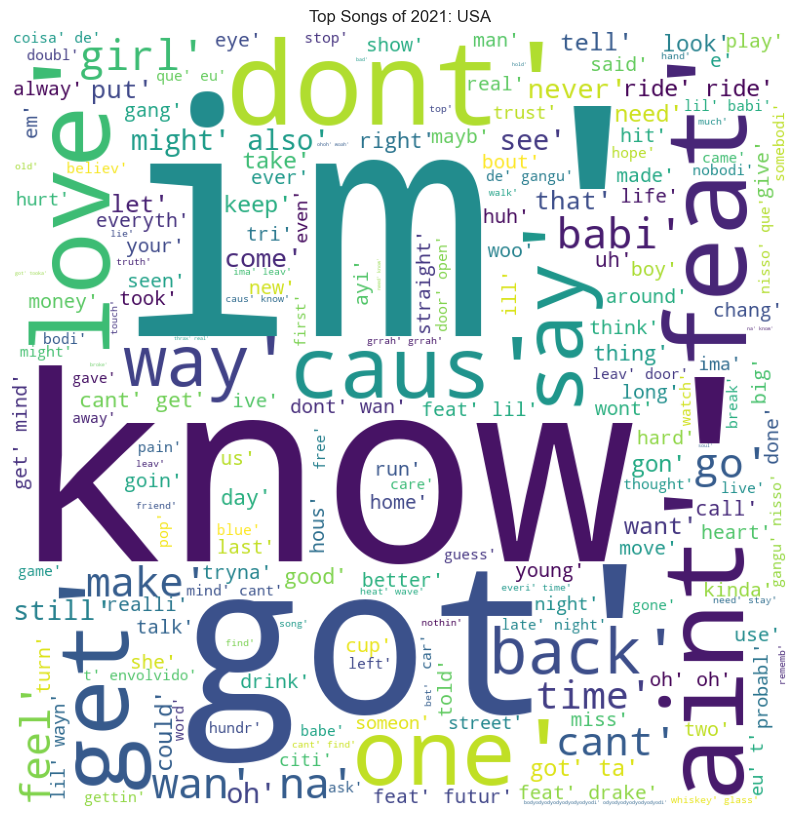

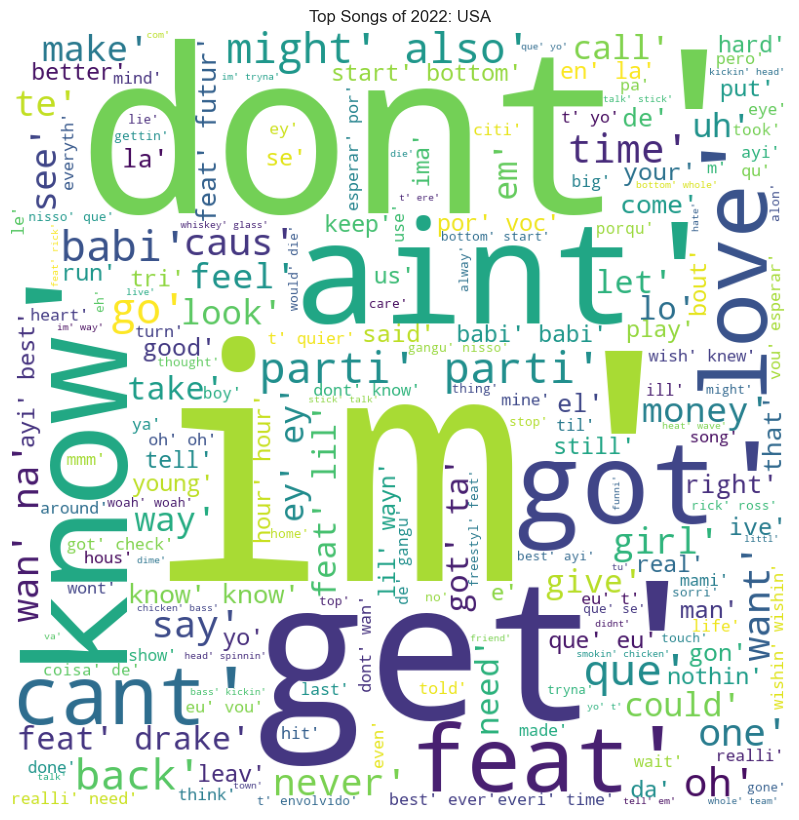

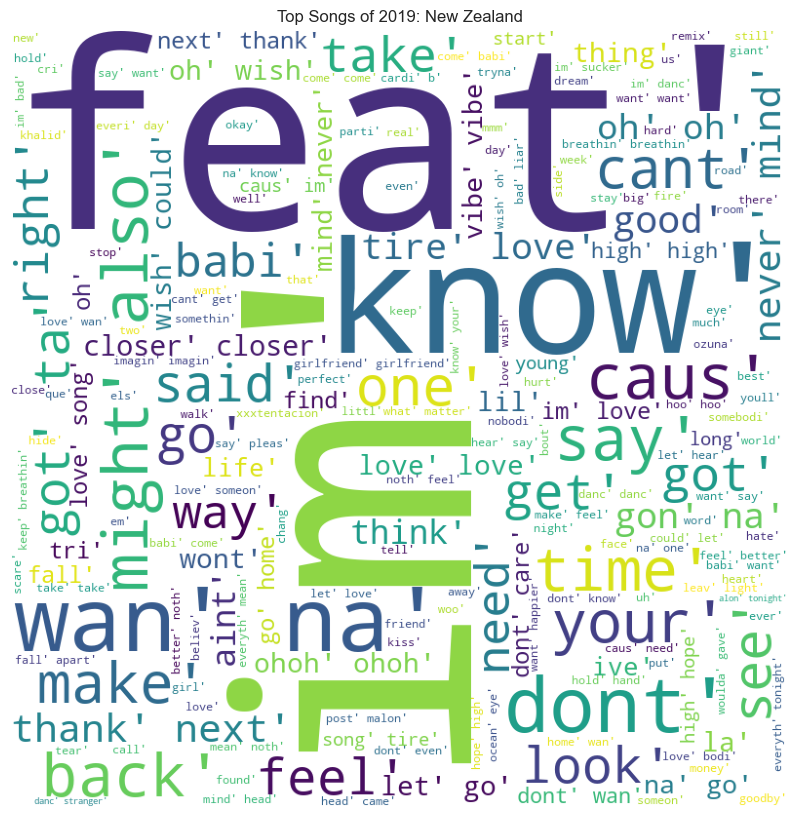

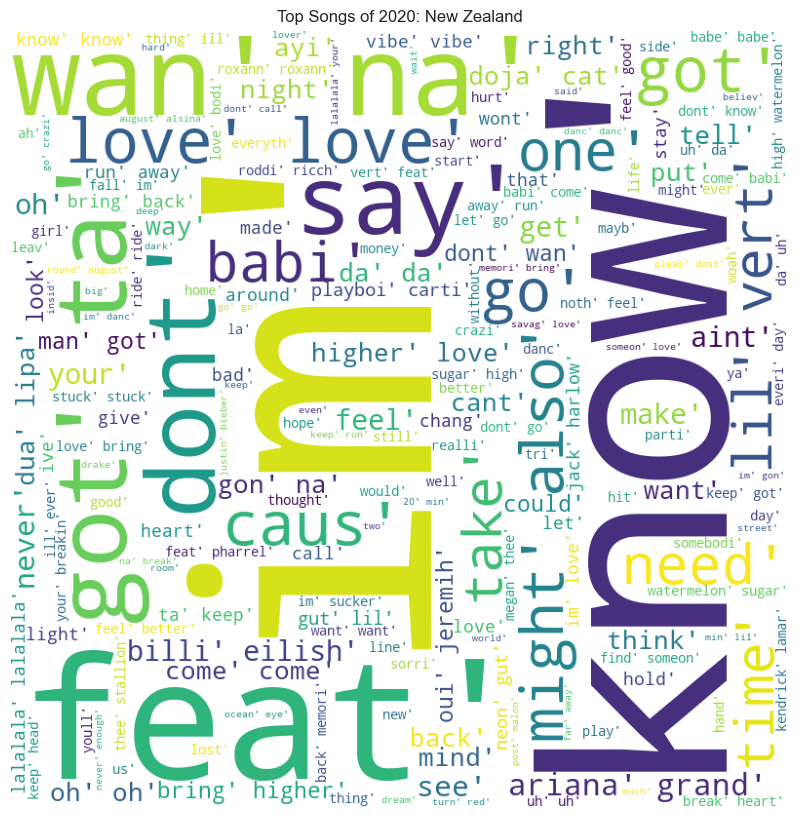

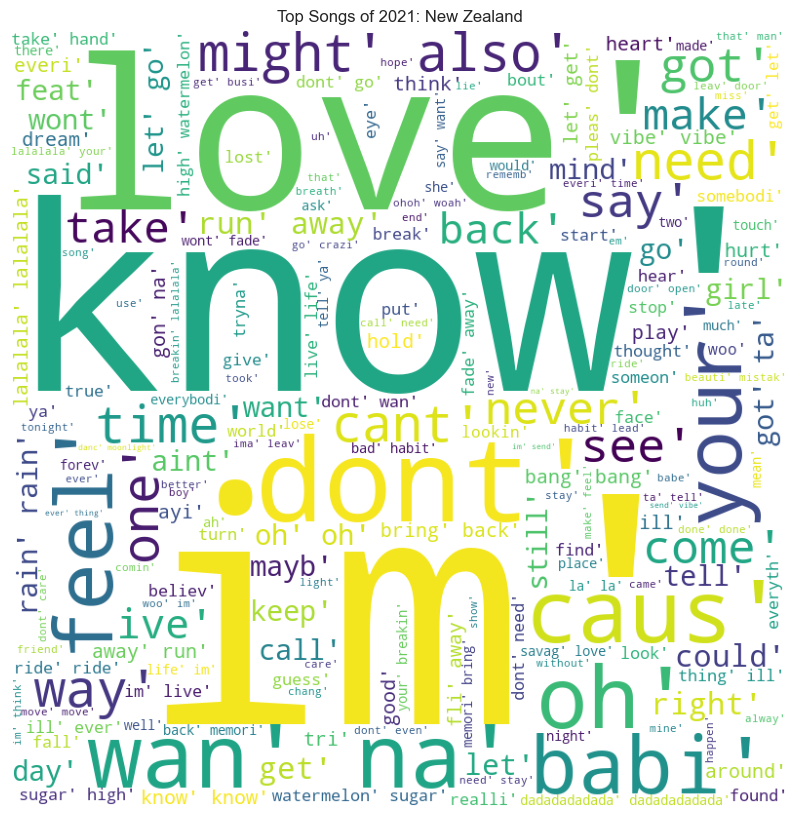

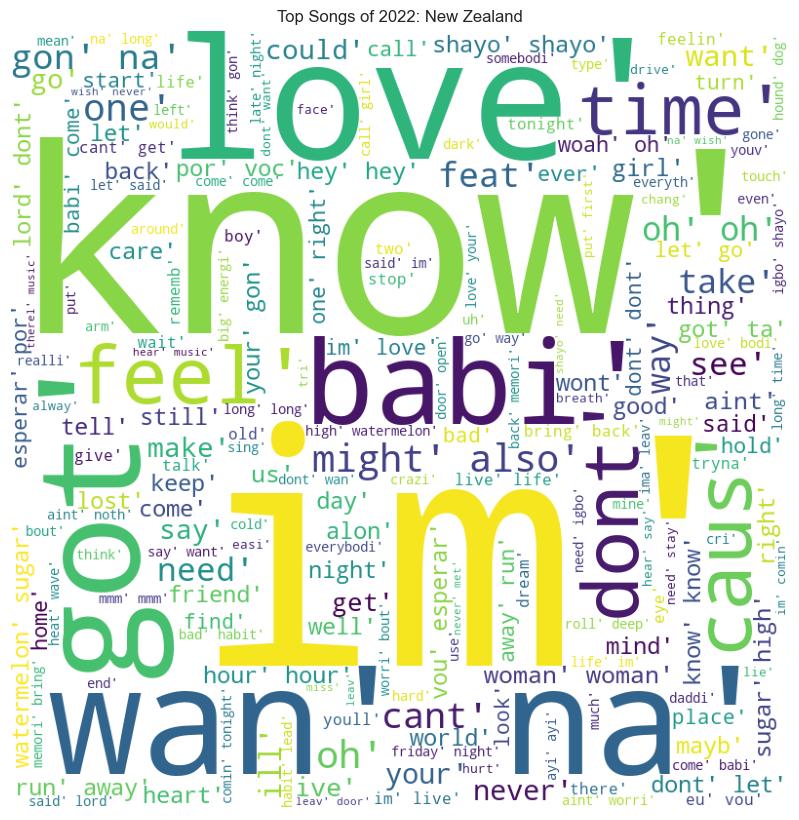

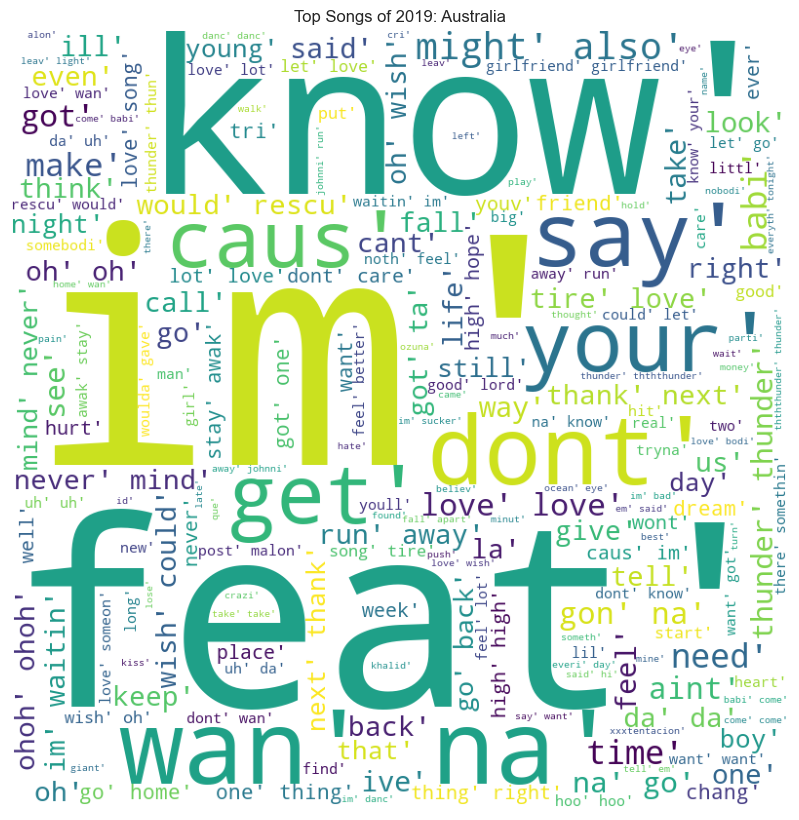

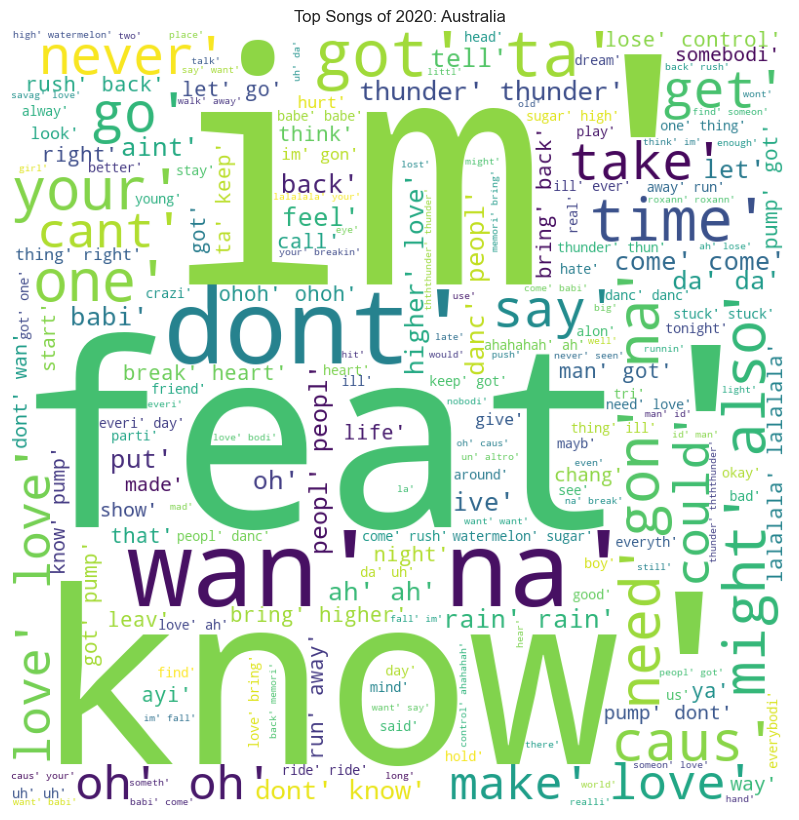

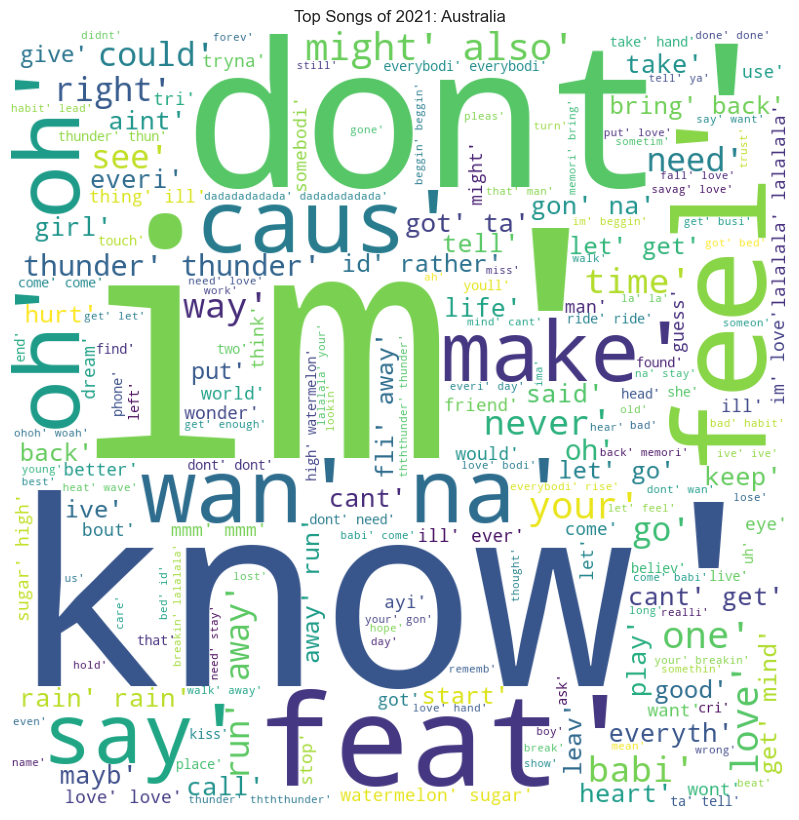

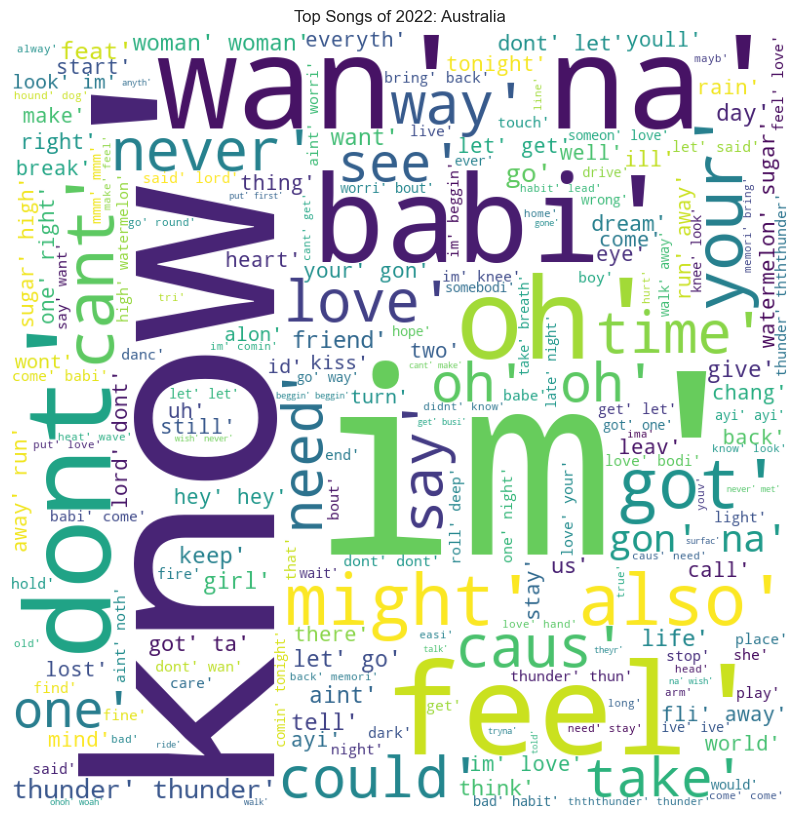

In [110]:
generate_wordclouds(alldfs)

## The average sentiment in each country/ year

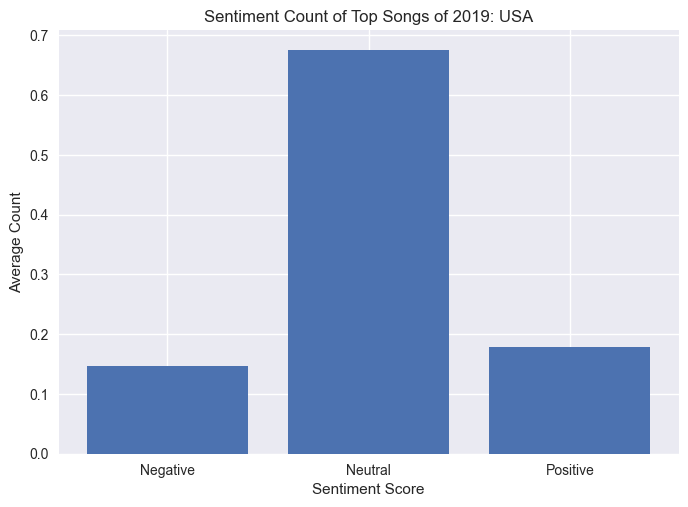

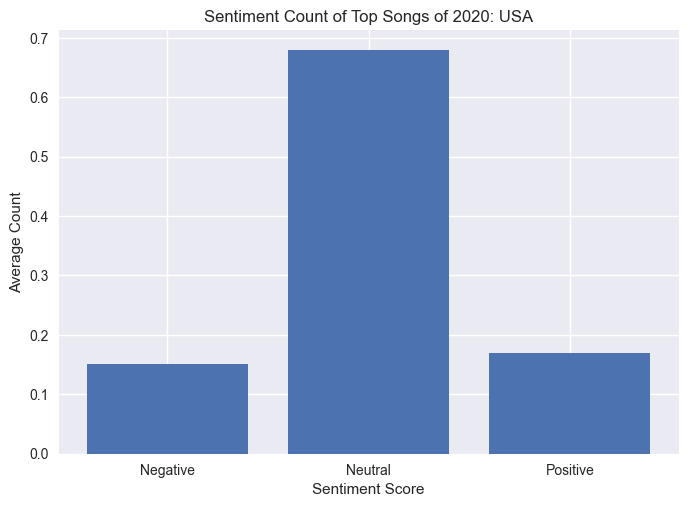

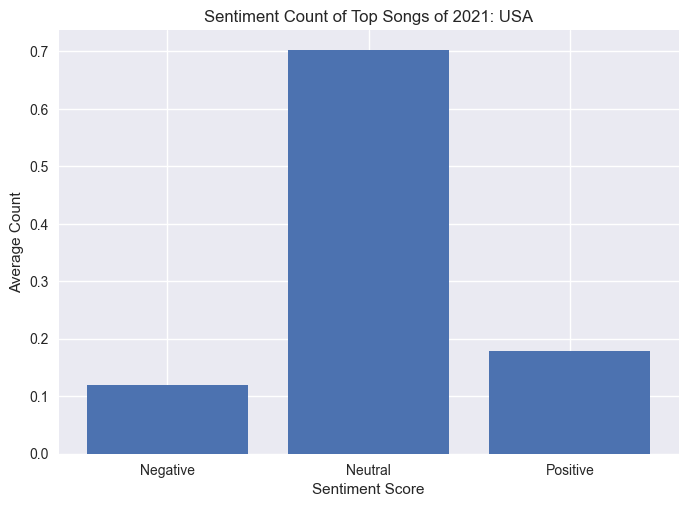

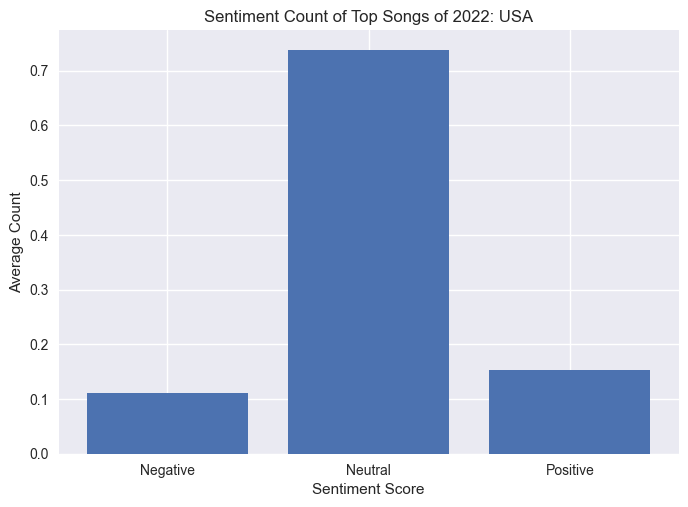

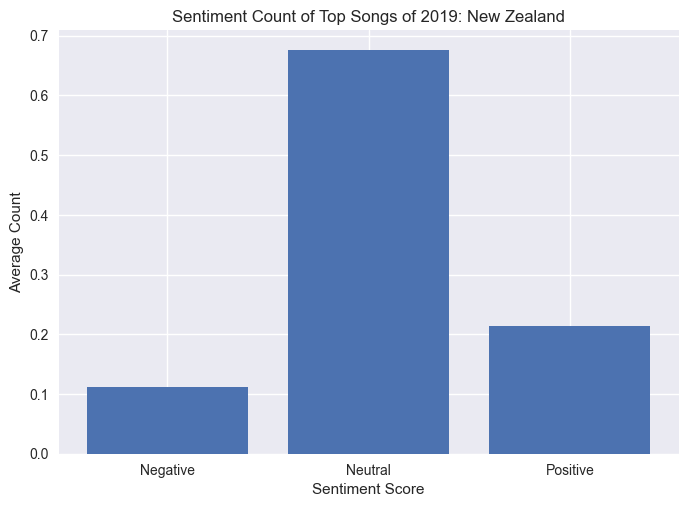

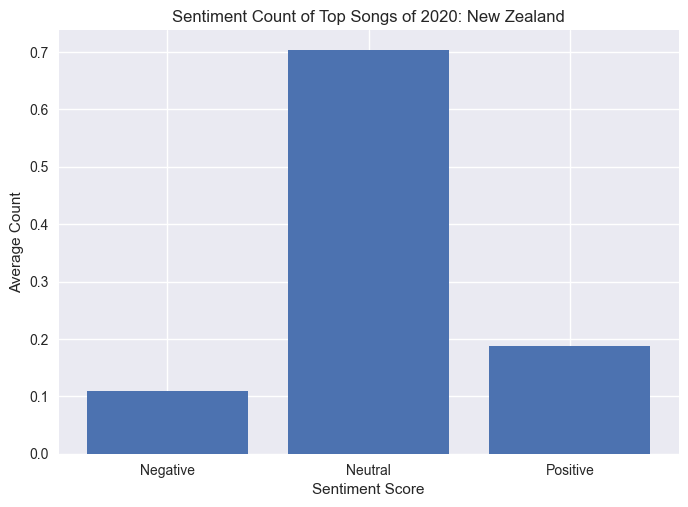

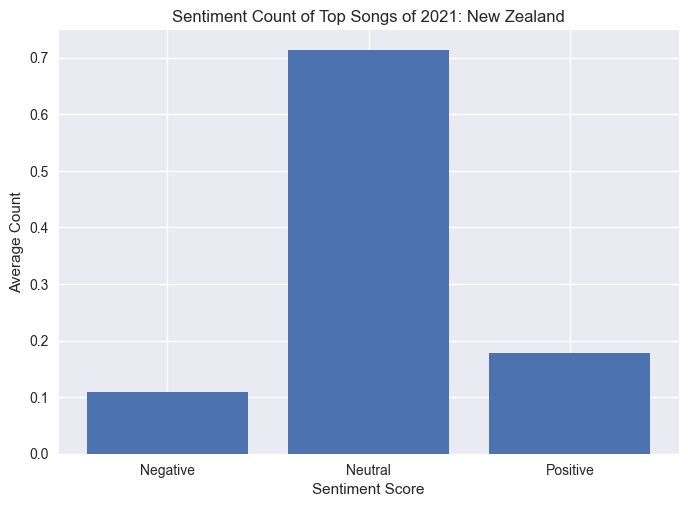

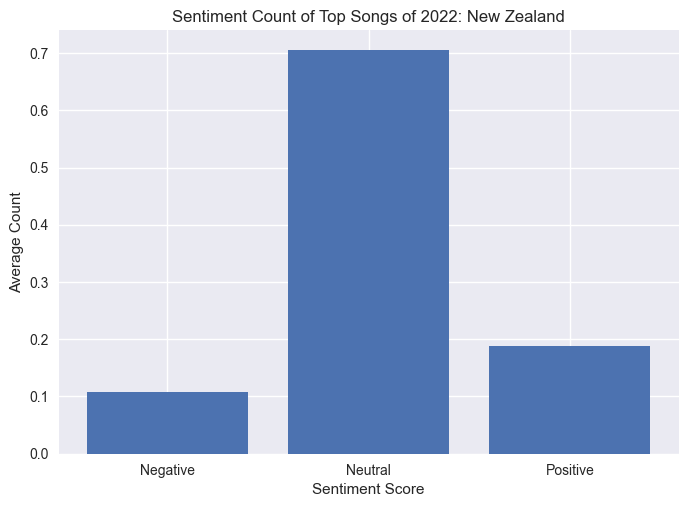

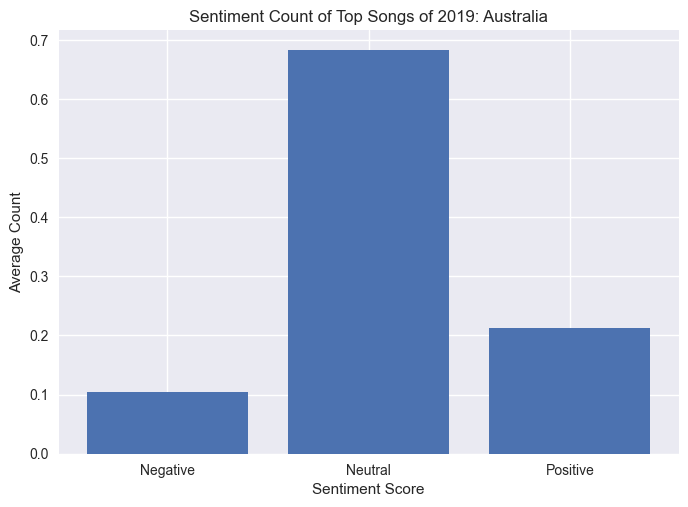

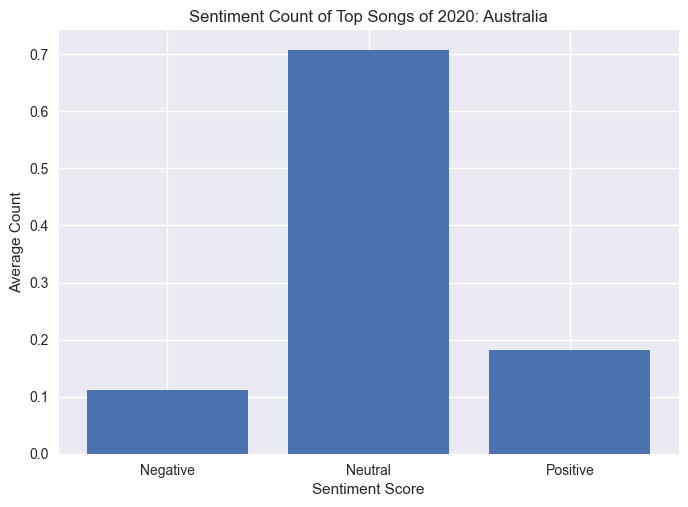

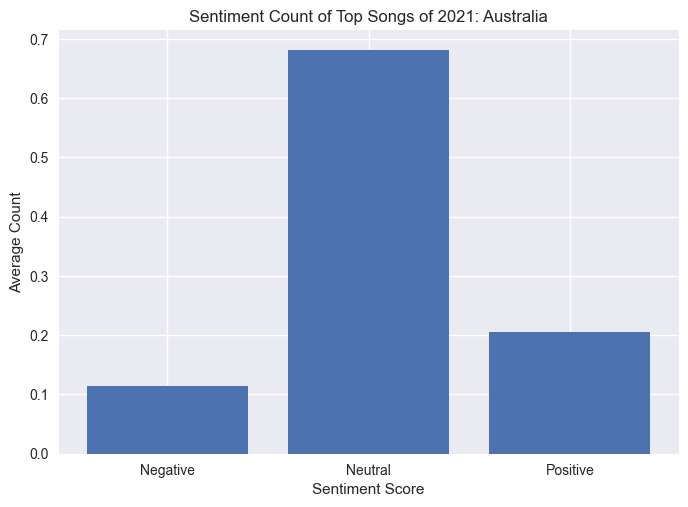

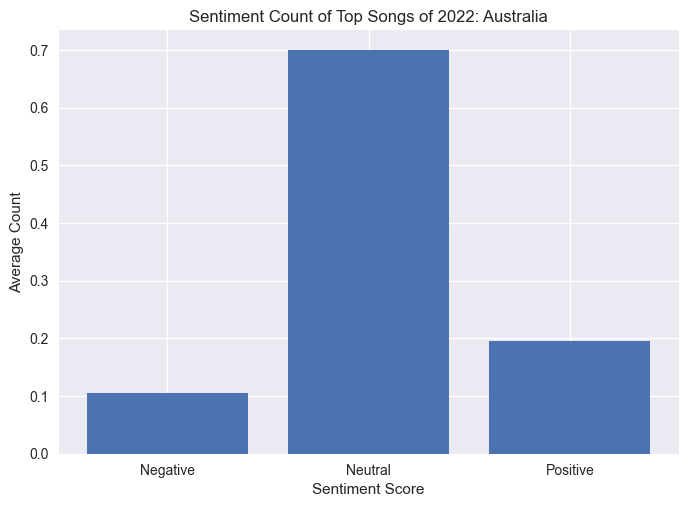

In [124]:

def histogram(alldfs):
    for df in alldfs:
        neg_mean = df['neg'].mean()
        neu_mean = df['neu'].mean()
        pos_mean = df['pos'].mean()

        mean_values = [neg_mean, neu_mean, pos_mean]
        # Create a list of the x-axis labels
        labels = ['Negative', 'Neutral', 'Positive']
        title = df.iloc[0]['title']
        # Create a bar plot of the mean values
        plt.bar(labels, mean_values)


        # Set the plot title and axis labels
        plt.title('Sentiment Count of '+ title)
        plt.xlabel('Sentiment Score')
        plt.ylabel('Average Count')

        # Show the plot
        plt.show()
histogram(alldfs)

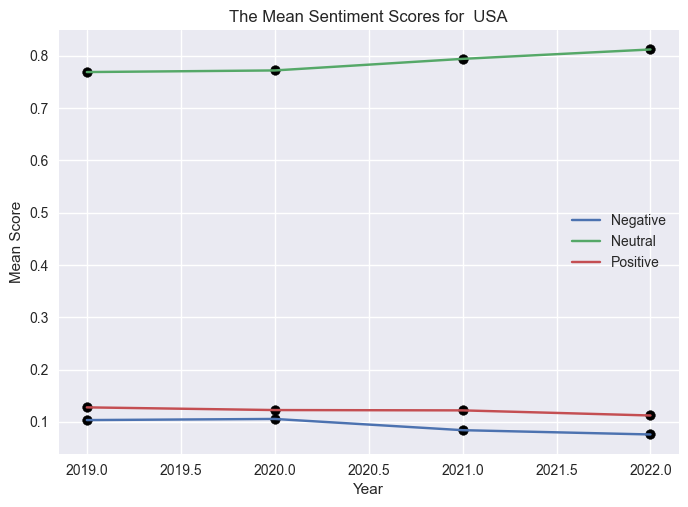

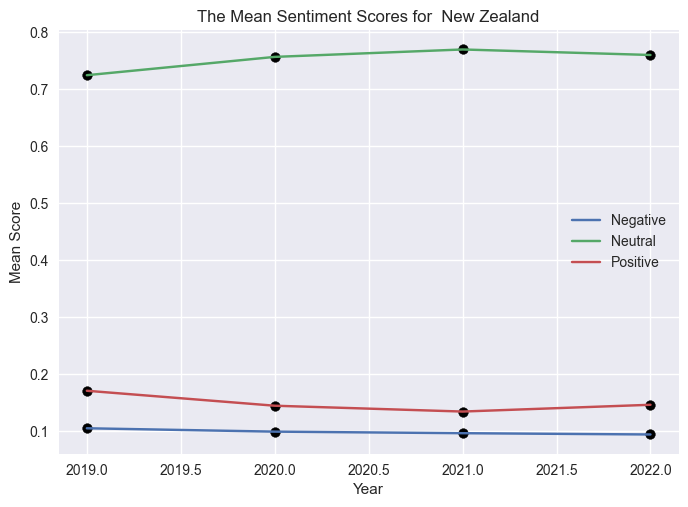

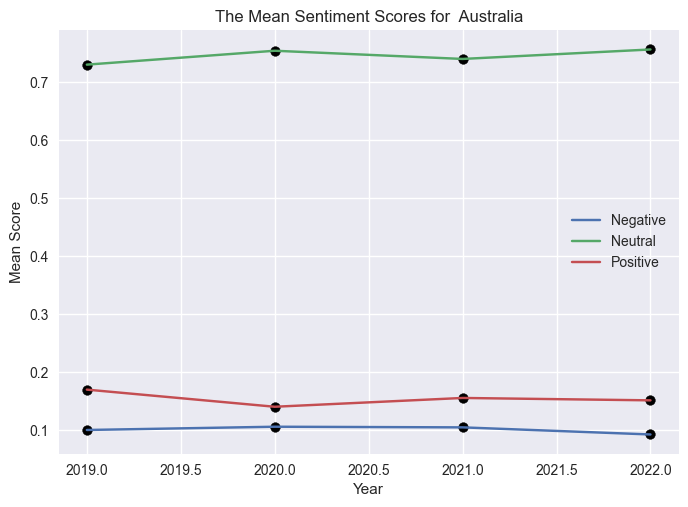

In [111]:
## Create a set of country names
countries = set(df.iloc[0]['title'].split(':')[1] for df in alldfs)

# Group the dataframes by country
grouped_dfs = {}
for country in countries:
    grouped_dfs[country] = [df for df in alldfs if df.iloc[0]['title'].split(':')[1] == country]

# Loop over each country
for country, dfs in grouped_dfs.items():
    # Create a list to store the data for each year
    year_data = []

    # Loop over each year
    for year in range(2019, 2023):
        # Filter the dataframes for the current year
        year_dfs = [df for df in dfs if int(df.iloc[0]['title'].split(':')[0][-4:]) == year]

        # If there is data for the current year, calculate the means and append to year_data
        if year_dfs:
            neg_mean = np.mean([df['neg'].mean() for df in year_dfs])
            neu_mean = np.mean([df['neu'].mean() for df in year_dfs])
            pos_mean = np.mean([df['pos'].mean() for df in year_dfs])
            year_data.append((neg_mean, neu_mean, pos_mean))
    
    # If there is data for the current country, plot the graph
    if year_data:
        # Create the x-axis labels
        years = [2019,2020,2021,2022]

        # Plot the data
        plt.plot(years, [data[0] for data in year_data], label='Negative')
        plt.plot(years, [data[1] for data in year_data], label='Neutral')
        plt.plot(years, [data[2] for data in year_data], label='Positive')
        plt.scatter(years, [data[0] for data in year_data], marker='o', color='black')
        plt.scatter(years, [data[1] for data in year_data], marker='o', color='black')
        plt.scatter(years, [data[2] for data in year_data], marker='o', color='black')
        #plt.yticks(range(int(min(years)),int(max(years))))
        # Set the title, x-axis label, y-axis label, and legend
        plt.title(f"The Mean Sentiment Scores for {country}")
        plt.xlabel('Year')
        plt.ylabel('Mean Score')
        #plt.yticks(range(int(min(year)), int(max(year))+1).astype(int))
        plt.legend()

        # Show the plot
        plt.show()

## Looking at the Artists and their poularity 

C:\Users\nicol\AppData\Local\Temp\ipykernel_26780\3782194263.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_artists.index, rotation=45, ha='right')


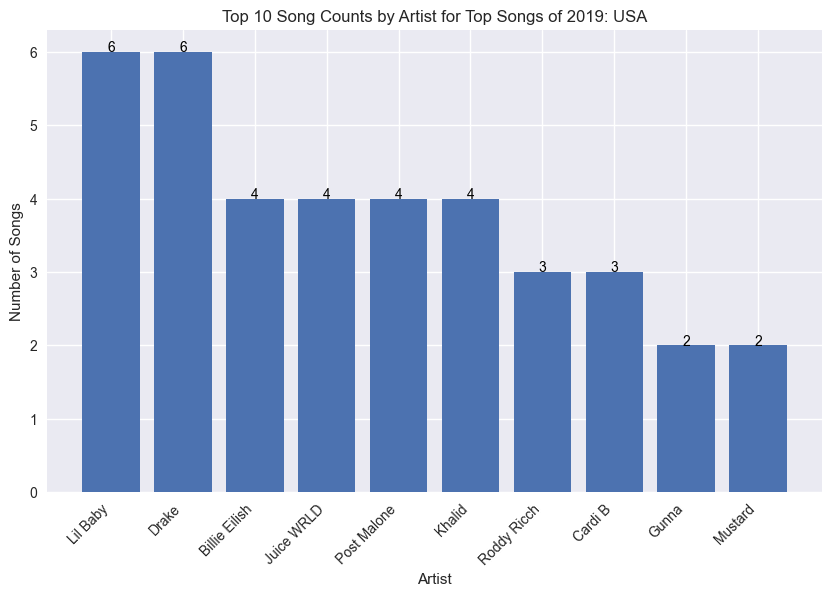

C:\Users\nicol\AppData\Local\Temp\ipykernel_26780\3782194263.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_artists.index, rotation=45, ha='right')


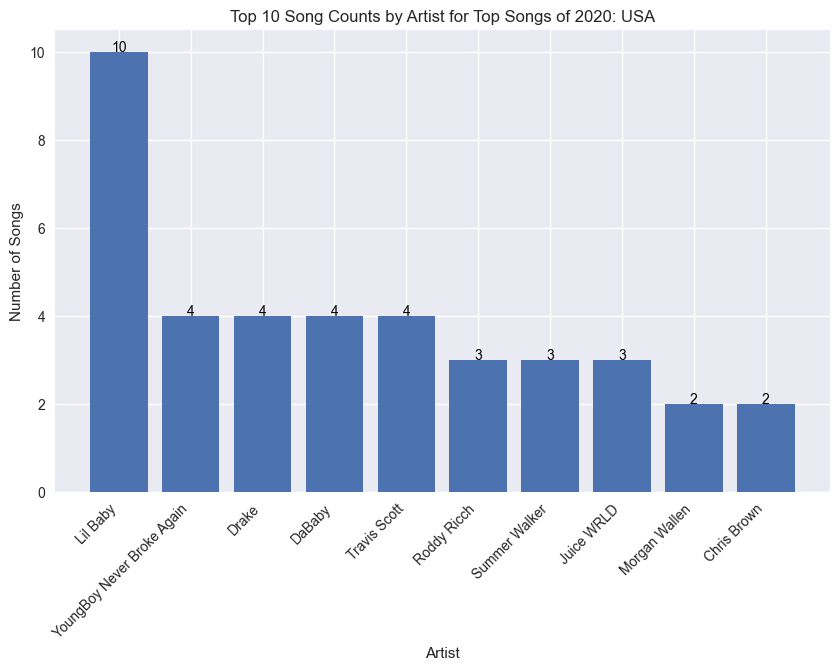

C:\Users\nicol\AppData\Local\Temp\ipykernel_26780\3782194263.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_artists.index, rotation=45, ha='right')


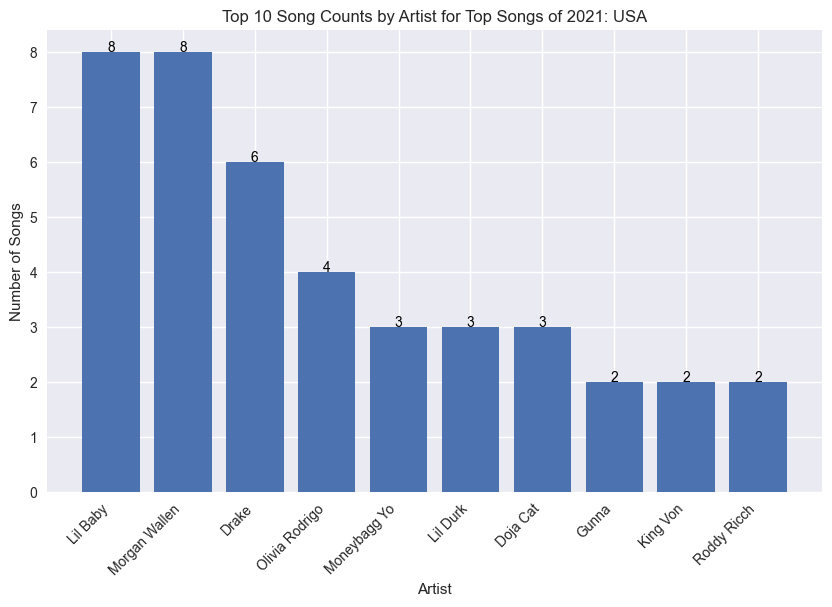

C:\Users\nicol\AppData\Local\Temp\ipykernel_26780\3782194263.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_artists.index, rotation=45, ha='right')


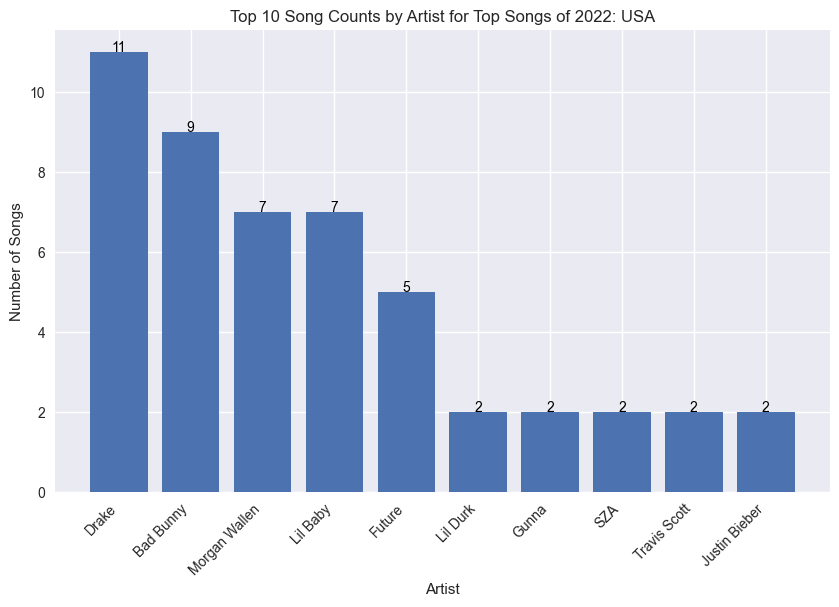

C:\Users\nicol\AppData\Local\Temp\ipykernel_26780\3782194263.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_artists.index, rotation=45, ha='right')


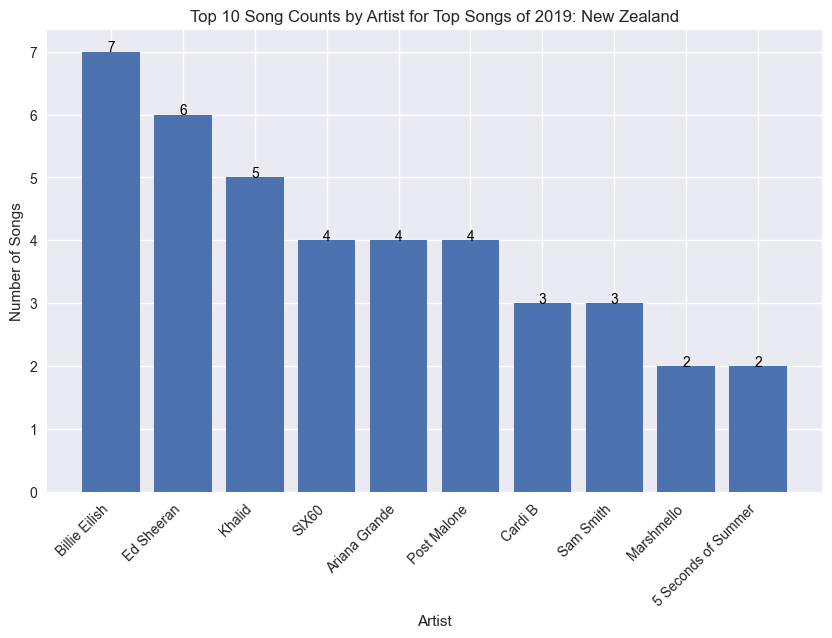

C:\Users\nicol\AppData\Local\Temp\ipykernel_26780\3782194263.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_artists.index, rotation=45, ha='right')


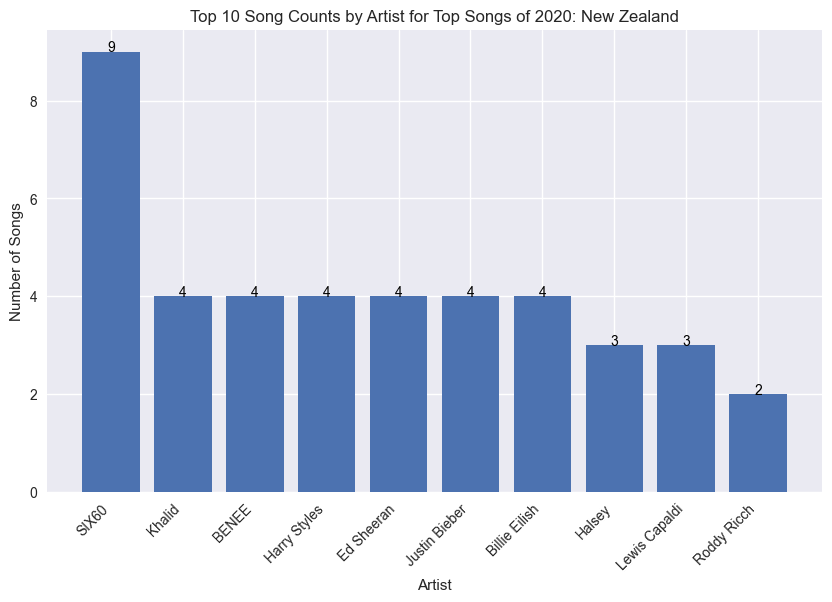

C:\Users\nicol\AppData\Local\Temp\ipykernel_26780\3782194263.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_artists.index, rotation=45, ha='right')


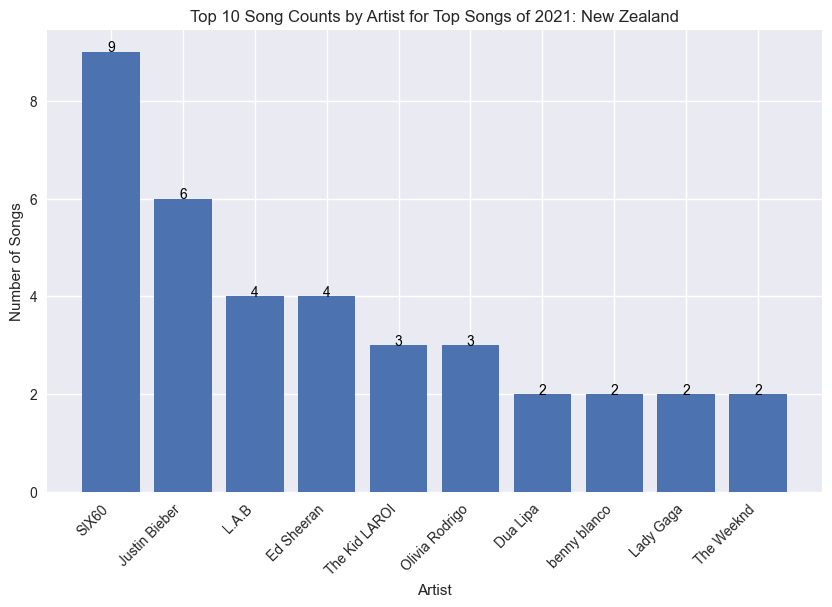

C:\Users\nicol\AppData\Local\Temp\ipykernel_26780\3782194263.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_artists.index, rotation=45, ha='right')


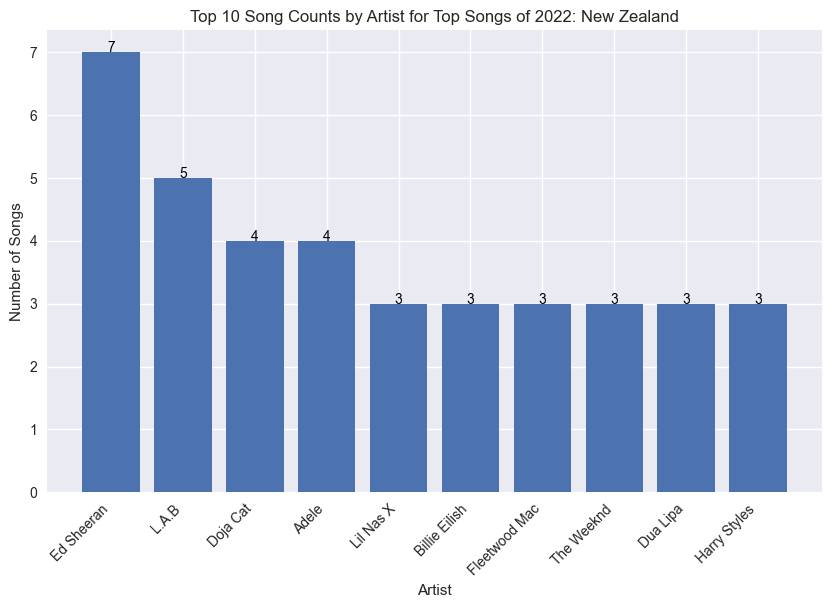

C:\Users\nicol\AppData\Local\Temp\ipykernel_26780\3782194263.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_artists.index, rotation=45, ha='right')


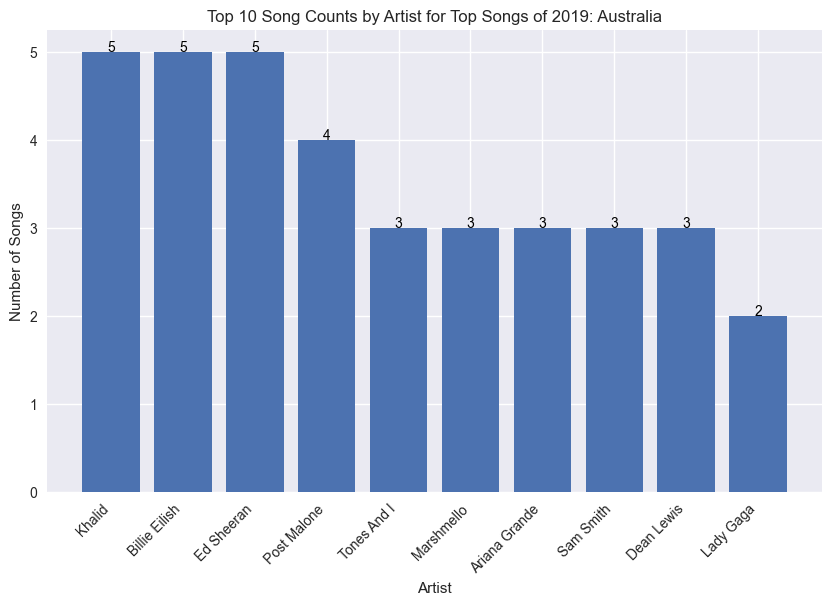

C:\Users\nicol\AppData\Local\Temp\ipykernel_26780\3782194263.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_artists.index, rotation=45, ha='right')


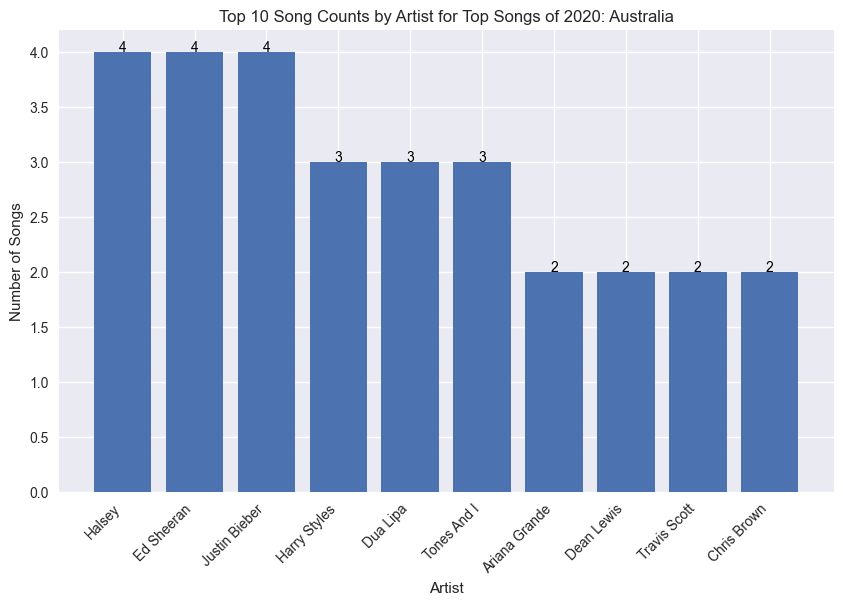

C:\Users\nicol\AppData\Local\Temp\ipykernel_26780\3782194263.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_artists.index, rotation=45, ha='right')


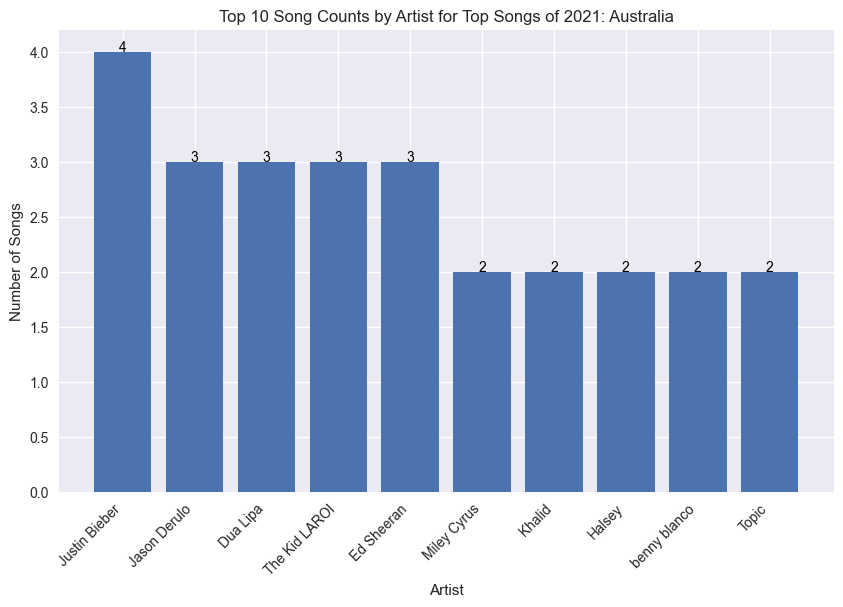

C:\Users\nicol\AppData\Local\Temp\ipykernel_26780\3782194263.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_artists.index, rotation=45, ha='right')


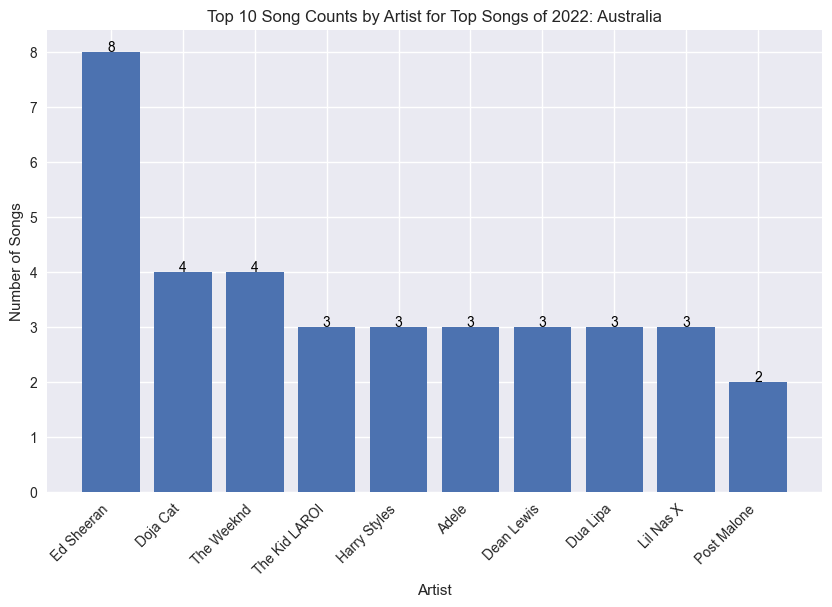

In [59]:
def count_artists(alldfs):
    for df in alldfs:
        artists = df['artist'].str.split(',', expand=True).values.flatten()
        artists = pd.Series(artists).str.strip()
        artist_counts = artists.value_counts()

        # Get the top 10 artists
        top_artists = artist_counts[:10]

        title = df.iloc[0]['title']
        plt.figure(figsize=(10, 6))
        ax = plt.subplot(111)
        ax.bar(top_artists.index, top_artists.values)
        ax.set_xticklabels(top_artists.index, rotation=45, ha='right')
        ax.set_xlabel('Artist')
        ax.set_ylabel('Number of Songs')
        ax.set_title('Top 10 Song Counts by Artist for ' + title)

        # Add count label to each bin
        for i, v in enumerate(top_artists.values):
            ax.text(i, v, str(v), color='black', ha='center')

        plt.show()

count_artists(alldfs)

Robustness checks: Sentiment analysis for Canada

In [ ]:
import pandas as pd
df= pd.read_csv("data/lists of songs/dataframe_with_lyrics_completecases_canada.csv")

In [ ]:
# Lowercasing
df['lyrics'] = df['lyrics'].str.lower()

# Removing punctuation
df['lyrics'] = df['lyrics'].apply(lambda x: re.sub('[^\w\s]', '', x))

# Tokenization and Stopword removal
stopwords = nltk.corpus.stopwords.words('english')

df['lyrics'] = df['lyrics'].apply(lambda x: [word for word in nltk.word_tokenize(x) if word not in stopwords])

# Stemming
stemmer = nltk.stem.PorterStemmer()
df['lyrics'] = df['lyrics'].apply(lambda x: [stemmer.stem(word) for word in x])

# Removing non-alphabetic characters
df['lyrics'] = df['lyrics'].apply(lambda x: [re.sub('[^A-Za-z0-9]+', '', word) for word in x])


In [ ]:
df['lyrics'] = df['lyrics'].apply(lambda x: [re.sub('[^A-Za-z0-9]+', '', word) for word in x if 'translation' not in word and 'lyric' not in word and 'yeah' not in word and 'like' not in word])


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the DataFrame
#df = pd.read_csv('lyrics.csv')

# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score for each row in the DataFrame
def get_sentiment(row):
    lyrics = row['lyrics']
    # Convert the list of lyrics to a string
    lyrics_str = ' '.join(lyrics)
    # Calculate the sentiment score for the lyrics string
    sentiment_score = sia.polarity_scores(lyrics_str)
    # Convert the sentiment score to a dictionary
    sentiment_dict = dict(sentiment_score)
    return sentiment_dict

# Apply the function to the DataFrame
df['sentiment'] = df.apply(get_sentiment, axis=1)

# Extract the sentiment score from the 'sentiment' column and add it to the DataFrame as separate columns
df['neg'] = df['sentiment'].apply(lambda x: x['neg'])
df['neu'] = df['sentiment'].apply(lambda x: x['neu'])
df['pos'] = df['sentiment'].apply(lambda x: x['pos'])
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

In [ ]:
df.to_csv("data/ds_sentiment_canada.csv")